# Binary Classification based on Logistic Regression using Nonlinear Regression
<hr>

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [2]:
filename1 = 'Assignment 08 data1.txt'
filename2 = 'Assignment 08 data2.txt'

data1 = np.genfromtxt(filename1, delimiter=',')
data2 = np.genfromtxt(filename2, delimiter=',')

# data[:,0]: x
# data[:,1]: y
# data[:,2]: label {0, 1}

## define the feature function for each data to obtain the best accuracy

In [3]:
def feature_function1(x, y):
    feature = []
    for i in range(len(x)):
        feature.append(np.array( [1, np.power(x[i], 2), np.power(y[i], 2)] ))
    feature = np.array(feature)
    
    return feature

In [4]:
def feature_function2(x, y):
    feature = []
    for i in range(len(x)):
        feature.append(np.array( [1, x[i], y[i], np.power(x[i], 2), np.power(x[i], 3)] ))
    feature = np.array(feature)
    
    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [5]:
def regression_function(theta, feature):
    value = np.dot(theta, feature)
    return value

## define sigmoid function with input $x$

In [6]:
def logistic_function(x):
    z = 1 / (1 + np.exp(-x))
    return z

## define loss function with feature and label based on the logistic regression

In [7]:
def compute_loss_feature(theta, feature, label):
    loss = 0
    n = label.size
    
    for i in range(n):
        regvalue = regression_function(theta, feature[i, :])
        sigvalue = logistic_function(regvalue)
        loss += (-label[i] * np.log(sigvalue) - (1 - label[i]) * np.log(1 - sigvalue)) / n

    return loss

## define gradient vector for the model parameters $\theta$

In [8]:
def compute_gradient_feature(theta, feature, label):
    gradient = 0
    n = label.size
    
    for i in range(n):
        regvalue = regression_function(theta, feature[i, :])
        sigvalue = logistic_function(regvalue)
        gradient += ((sigvalue - label[i]) * feature[i, :]) / n

    return gradient

## compute the accuracy

In [9]:
def compute_accuracy(theta, feature, label):
    predict = 0
    n = label.size
    
    for i in range(n):
        regvalue = regression_function(theta, feature[i, :])
        sigvalue = logistic_function(regvalue)
    
        if sigvalue >= 0.5 and label[i] == 1:
            predict += 1
        elif sigvalue < 0.5 and label[i] == 0:
            predict += 1
            
    accuracy = predict / n
    return accuracy

## gradient descent for the model parameters $\theta$

In [10]:
num_iteration   = 30000        
learning_rate   = 0.3           
theta           = np.array((0, 0, 0))

# data1 관련 변수
theta_iteration1 = np.zeros((num_iteration, 3))
loss_iteration1 = np.zeros(num_iteration)
label1 = data1[:, 2]

# data1 feature 변수 정의
feature1 = feature_function1(data1[:, 0], data1[:, 1])

# data1에서 theta, loss 계산 
for i in range(num_iteration):
    theta  = theta - learning_rate * compute_gradient_feature(theta, feature1, label1)
    loss   = compute_loss_feature(theta, feature1, label1)
    
    theta_iteration1[i]  = theta.reshape(1, 3)
    loss_iteration1[i]   = loss

In [11]:
num_iteration   = 30000        
learning_rate   = 0.3
theta           = np.array((0, 0, 0, 0, 0))

# data2 관련 변수    
theta_iteration2 = np.zeros((num_iteration, 5))
loss_iteration2 = np.zeros(num_iteration)    
label2 = data2[:, 2]

# data2 feature 변수 정의
feature2 = feature_function2(data2[:, 0], data2[:, 1])

# data2에서 theta, loss 계산
for i in range(num_iteration):
    theta  = theta - learning_rate * compute_gradient_feature(theta, feature2, label2)
    loss   = compute_loss_feature(theta, feature2, label2)
    
    theta_iteration2[i]  = theta.reshape(1, 5)
    loss_iteration2[i]   = loss

## compute accuracy of the classifiers

In [12]:
theta1_optimal = theta_iteration1[num_iteration-1]
theta2_optimal = theta_iteration2[num_iteration-1]

accuracy_classifier1 = compute_accuracy(theta1_optimal, feature1, label1)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature2, label2)

## plot the results

In [13]:
def plot_data(data):
    plt.figure(figsize=(8,8))  
    plt.title('data')

    for i in range(data.shape[0]):
        if data[i, 2] == 0:
            plt.plot(data[i, 0], data[i, 1], '.', color='blue')
        elif data[i, 2] == 1:
            plt.plot(data[i, 0], data[i, 1], '.', color='red')

    plt.tight_layout()
    plt.show()
    
    
    
def plot_model_parameter(theta_iteration):
    plt.figure(figsize=(8,6))   
    plt.title('model parameter')
    plt.xlabel('iteration')
    
    n = theta_iteration.shape[1]
    for i in range(n):
        plt.plot(theta_iteration[:, i], '-', label=r"$\theta_{}$".format(i))
        
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    
    
def plot_loss_curve(loss_iteration):
    plt.figure(figsize=(8,6))   
    plt.title('loss')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.plot(loss_iteration, '-', color='red')
    
    plt.tight_layout()
    plt.show()
    
    
    
def plot_classifier1(data, theta):
    plt.figure(figsize=(8,8)) 
    plt.title('data1 classifier')
    
    grid_x = np.arange(-2.5, 2.5, 0.01)
    grid_y = np.arange(-4.5, 4.5, 0.01)
    XX, YY = np.meshgrid(grid_x, grid_y)
    
    feature = feature_function1(XX, YY)
    ZZ = []
    for i in range(len(XX)):
        ZZ.append( regression_function(theta, feature[i, :]) )
    ZZ = np.array(ZZ)
    
    # 데이터 포인트
    for i in range(len(data)):
        if data[i, 2] == 0:
            plt.plot(data[i, 0], data[i, 1], '.', color='blue')
        elif data[i, 2] == 1:
            plt.plot(data[i, 0], data[i, 1], '.', color='red')
            
    # 배경
    plt.scatter(XX, YY, c=ZZ, cmap='coolwarm')
    plt.colorbar()
    
    # 검은 선
    plt.contour(XX, YY, ZZ, levels=[0], colors='black')
    
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    
    
def plot_classifier2(data, theta):
    plt.figure(figsize=(8,8)) 
    plt.title('data2 classifier')
    
    grid_x = np.arange(-1.5, 2.5, 0.01)
    grid_y = np.arange(-1, 1.5, 0.01)
    XX, YY = np.meshgrid(grid_x, grid_y)
    
    feature = feature_function2(XX, YY)
    ZZ = []
    for i in range(len(XX)):
        ZZ.append( regression_function(theta, feature[i, :]) )
    ZZ = np.array(ZZ)
    
    # 데이터 포인트
    for i in range(len(data)):
        if data[i, 2] == 0:
            plt.plot(data[i, 0], data[i, 1], '.', color='blue')
        elif data[i, 2] == 1:
            plt.plot(data[i, 0], data[i, 1], '.', color='red')
            
    # 배경
    plt.scatter(XX, YY, c=ZZ, cmap='coolwarm')
    plt.colorbar()
    
    # 검은 선
    plt.contour(XX, YY, ZZ, levels=[0], colors='black')
    
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Results
<hr>

## 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

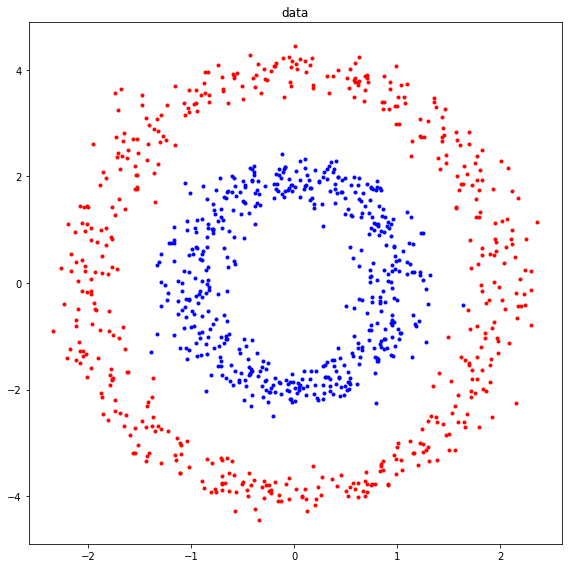

In [14]:
plot_data(data1)

## 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

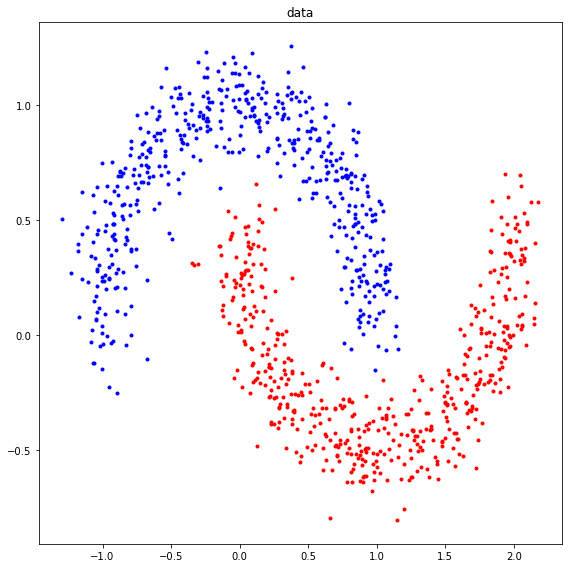

In [15]:
plot_data(data2)

## 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

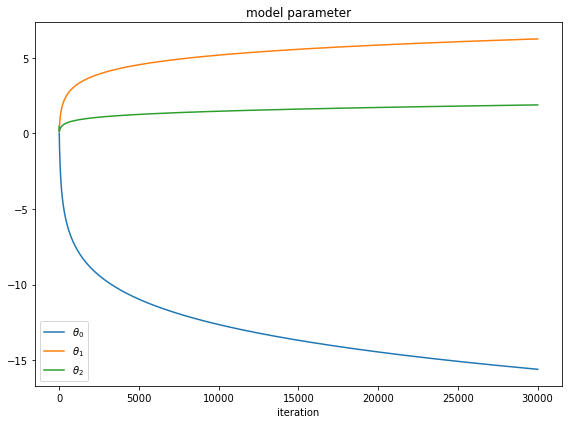

In [16]:
plot_model_parameter(theta_iteration1)

## 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

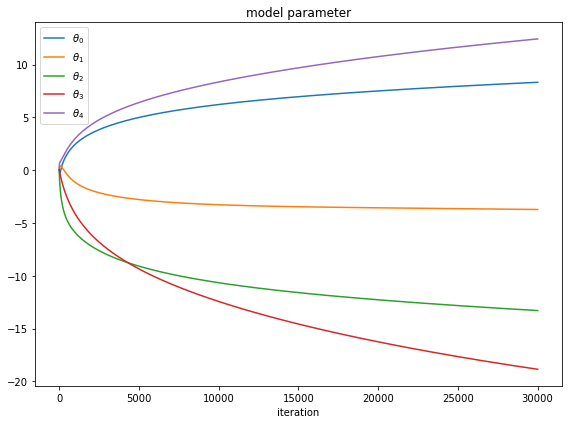

In [17]:
plot_model_parameter(theta_iteration2)

## 05. plot the loss values in red curve over the gradient descent iterations for data1

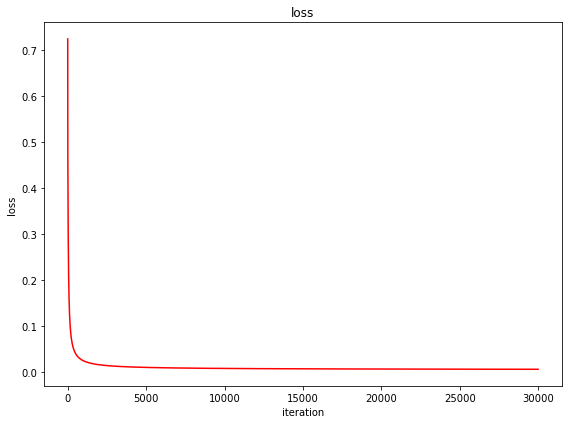

In [18]:
plot_loss_curve(loss_iteration1)

## 06. plot the loss values in red curve over the gradient descent iterations for data2

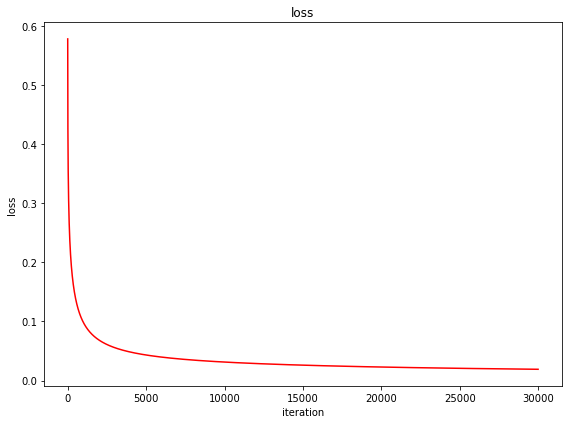

In [19]:
plot_loss_curve(loss_iteration2)

## 07. plot the classifier with the given data points superimposed for data1

<ipython-input-3-425233a4af7f>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  feature.append(np.array( [1, np.power(x[i], 2), np.power(y[i], 2)] ))


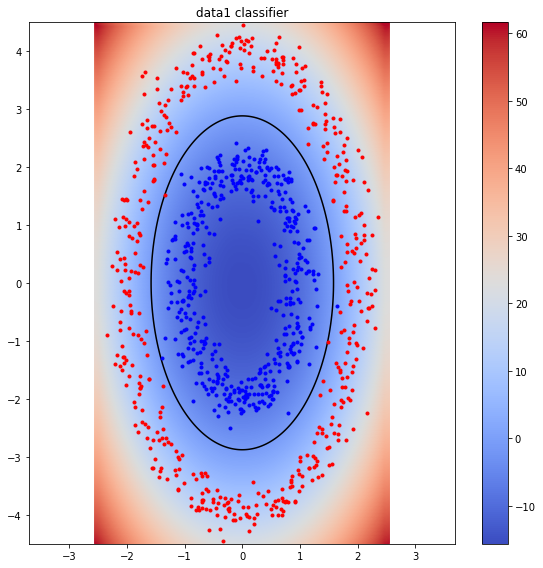

In [20]:
plot_classifier1(data1, theta1_optimal)

## 08. plot the classifier with the given data points superimposed for data2

<ipython-input-4-03b5f4ab7ec0>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  feature.append(np.array( [1, x[i], y[i], np.power(x[i], 2), np.power(x[i], 3)] ))


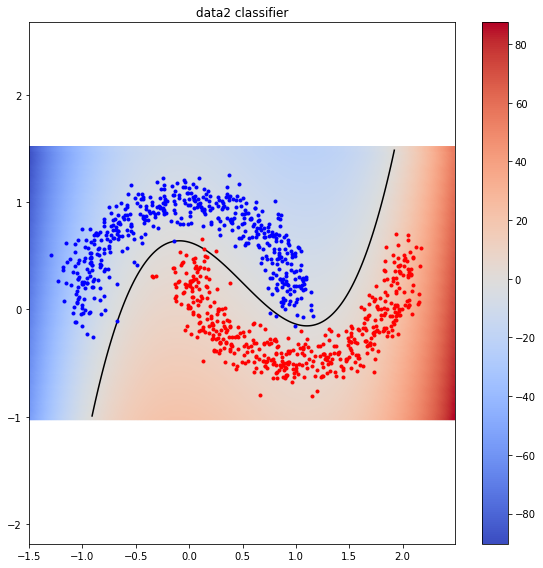

In [21]:
plot_classifier2(data2, theta2_optimal)

## 09. print out the accuracy of the obtained classifier1 for data1

In [22]:
print(accuracy_classifier1)

0.999


## 10. print out the accuracy of the obtained classifier2 for data1

In [23]:
print(accuracy_classifier2)

0.994
